In [50]:
DATA_PATH = '../../data/'
LIGHTCURVES_PATH = DATA_PATH + 'lightcurves/'

In [51]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [52]:
import pandas as pd
import numpy as np

Load transient catalinaID Catalogue

In [53]:
df_out = pd.read_pickle('../../data/' + 'transient_catalinaIDs.pickle')
print(df_out.shape)

(4280, 5)


Load non-transient Light Curves

In [54]:
filename = 'nontransient_lightcurves.pickle'
indir = LIGHTCURVES_PATH; filepath = indir + filename
df_lcs = pd.read_pickle(filepath)
df_lcs['CatalinaID'] = pd.to_numeric(df_lcs.ID.str[6:])
print(df_lcs.ID.unique().shape)

(16940,)


Check that nontransient Lightcurve IDs are not in the transients CatalinaIDs

In [55]:
any_exist = False
catalinaID_list = df_out.CatalinaID.unique()
for lcs_id in df_lcs.CatalinaID.astype(np.int64).unique():
    curr_exists = lcs_id in catalinaID_list
    any_exist = any_exist or curr_exists
print('Any exist:', str(any_exist))

Any exist: False


Describre non-transients observation count

In [56]:
df_lcs_numobs = df_lcs.groupby('ID')['Mag'].count()

In [57]:
df_lcs_numobs.describe()

count    16940.000000
mean       113.601476
std        129.259273
min          1.000000
25%         16.000000
50%         61.000000
75%        176.000000
max       1266.000000
Name: Mag, dtype: float64

Date of first observation

In [58]:
df_lcs.sort_values(['MJD'])['MJD'].iloc[0]

53464.153989999999

Count number of objects with at least 5 observations

In [59]:
# Delete rows of blended observations
df_lcs = df_lcs.drop_duplicates(['ID','MJD'], keep='first')
# Add observation count to every nontransient
df_count = df_lcs.groupby('ID', as_index=False).count()
df_count['ObsCount'] = df_count['Mag']
df_count = df_count[['ID', 'ObsCount']]
df_lcs = df_lcs.merge(df_count, how='inner')

Describe non-transients observation count (with observations >= 5)

In [60]:
# Remove nontransient objects with less than 5 observations
df_lcs5 = df_lcs[df_lcs.ObsCount >= 5]
np.random.seed(42)
# Sample non-transient subset of same size as transients
sample_size = 4384
IDs = np.random.choice(df_lcs5.ID.unique(), size=sample_size, replace=False)
df_lcs5 = df_lcs5[df_lcs5.ID.isin(IDs)]
df_lcs5.ID.unique().shape

(4384,)

In [61]:
df_lcs_numobs_filtered = df_lcs5.groupby('ID')['Mag'].count()

In [62]:
df_lcs_numobs_filtered.describe()

count    4384.000000
mean      120.373403
std       115.846230
min         5.000000
25%        27.000000
50%        73.000000
75%       196.000000
max       527.000000
Name: Mag, dtype: float64

Count number of objects with at least 10 observations

In [63]:
# Remove nontransient objects with less than 5 observations
df_lcs10 = df_lcs[df_lcs.ObsCount >= 10]
np.random.seed(42)
# Sample non-transient subset of same size as transients
sample_size = 3728
IDs = np.random.choice(df_lcs10.ID.unique(), size=sample_size, replace=False)
df_lcs10 = df_lcs10[df_lcs10.ID.isin(IDs)]
df_lcs10.ID.unique().shape

(3728,)

Describe non-transients observation count (with observations >= 10)

In [64]:
df_lcs_numobs_filtered = df_lcs10.groupby('ID')['Mag'].count()

In [65]:
df_lcs_numobs_filtered.describe()

count    3728.000000
mean      128.918723
std       117.190136
min        10.000000
25%        36.000000
50%        81.000000
75%       204.000000
max       528.000000
Name: Mag, dtype: float64

In [163]:
def plot_lightcurve(lc):
    plot = lc.plot(x='MJD', y='Mag', marker='.', markeredgecolor='black', linestyle='None', legend=False, figsize=(7,7),ylim=(10,30), yerr='Magerr', elinewidth=0.7)
    plot.set_xlabel('Modified Julian Date')
    plot.set_ylabel('Mag')

In [145]:
def lightcurve(objid):
    df_lc = df_lcs[df_lcs.ID == objid]
    return df_lc

In [129]:
df = df_lcs[df_lcs.ID.isin(df_lcs_numobs[((df_lcs_numobs <= 50) & (df_lcs_numobs >= 10))].index)]

In [130]:
#df = df_lcs.copy()
IDs = df.ID.unique()
np.random.seed(42)
rand = np.random.randint(0, IDs.shape[0]-1, 4)
randIds = IDs[rand]

In [138]:
for objID in randIds:
    #objID = df.ID.unique()[84]#[79]
    obj_lightcurve = lightcurve(objID)
    print(objID)
    plot_lightcurve(obj_lightcurve)
    plt.savefig('./graphs/nont_{}.png'.format(objID))
    plt.close()

CataID2107022010130
CataID2004185017956
CataID2121100028895
CataID1009084056473


Visualize correctly classified in binary task

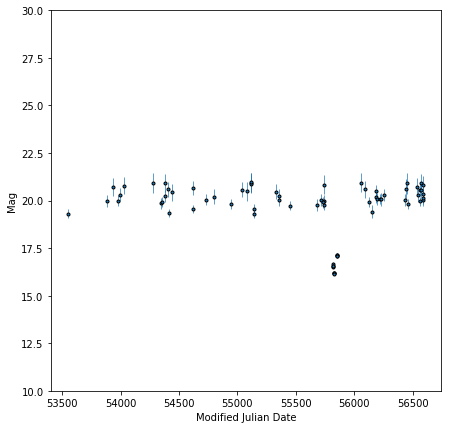

In [164]:
classified_ids = ['CataID1007113019532']
for ix, _ in enumerate(classified_ids):
    lc = lightcurve(classified_ids[ix])
    plot_lightcurve(lc)
#    plt.savefig('./graphs/binary/nont_corr_{}.png'.format(classified_ids[ix]))
#    plt.close()

Visualize incorrectly classified in binary task

In [161]:
missclassified_ids = ['CataID1121045042989', 'CataID1007074062606', 'CataID2013203017370', 'CataID1001128050211']
for ix, _ in enumerate(missclassified_ids):
    lc = lightcurve(missclassified_ids[ix])
    plot_lightcurve(lc)
    plt.savefig('./graphs/binary/nont_incorr_{}.png'.format(missclassified_ids[ix]))
    plt.close()